### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [23]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt

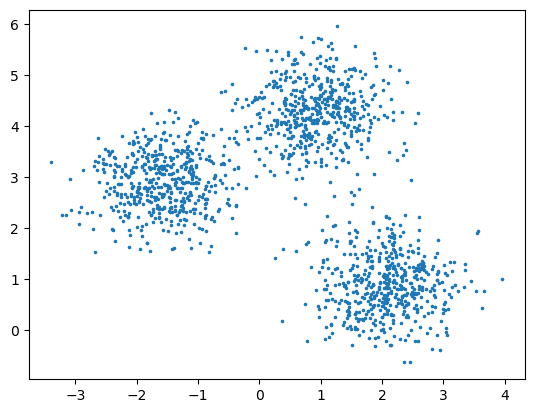

In [24]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [25]:
from sklearn.svm import SVC

model_ovo = SVC(kernel="linear", decision_function_shape="ovo", C=1)

model_ovo.fit(X, y)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [26]:
import numpy as np

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)  # Use RdBu colormap for binary classification
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1]) # Plot margins and hyperplane

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, marker=".", s=10, cmap=plt.cm.RdBu, edgecolors='k') #Consistent colormap

    # Plot the support vectors (optional, but good to visualize)
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=80, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(loc='best')
    plt.show()

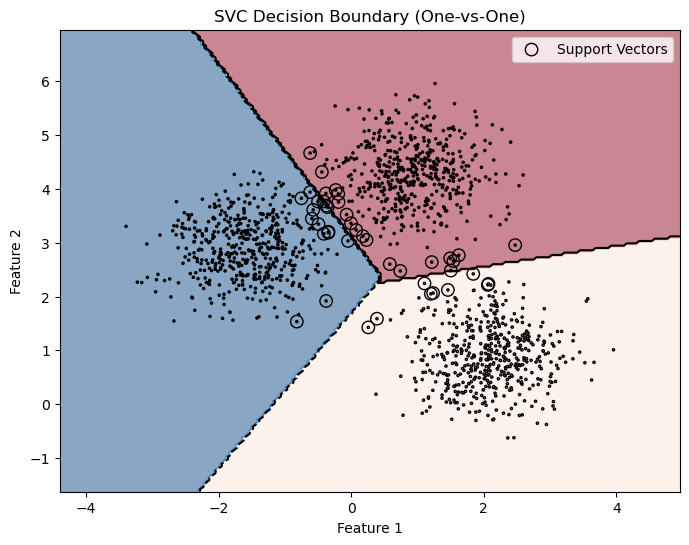

In [27]:
plot_decision_boundary(X, y, model_ovo, title="SVC Decision Boundary (One-vs-One)")

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

In [28]:
model_ovr = SVC(kernel="linear", decision_function_shape="ovr", C=1)

model_ovr.fit(X, y)

SVC(C=1, kernel='linear')

In [29]:
def plot_ovr_decision_boundary(X, y, model, title="OVR Decision Boundary"):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, marker=".", s=10, cmap=plt.cm.viridis, edgecolors='k')

    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=80, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

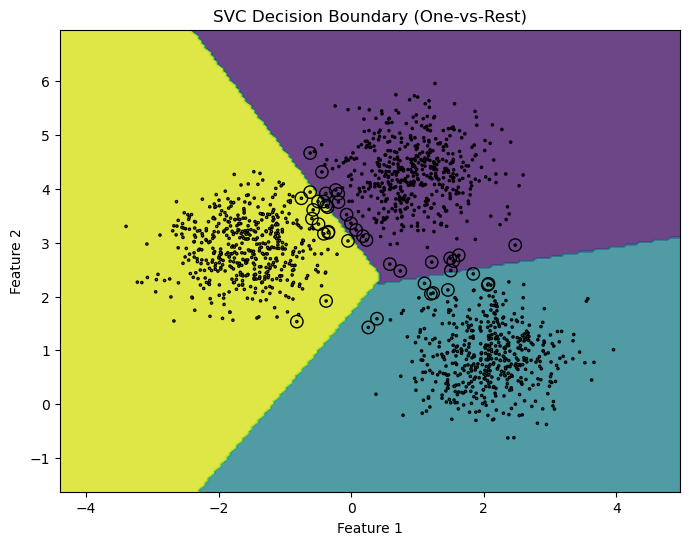

In [30]:
plot_ovr_decision_boundary(X, y, model_ovr, title="SVC Decision Boundary (One-vs-Rest)")

### Using 5-fold cross validation compare the accuracies of each method

In [32]:
from sklearn.model_selection import cross_val_score

cv_scores_ovr = cross_val_score(model_ovr, X, y, cv=5)
cv_scores_ovo = cross_val_score(model_ovo, X, y, cv=5)

print("OVR Cross-validation scores:", cv_scores_ovr)
print("OVO Cross-validation scores:", cv_scores_ovo)

print("OVR Mean accuracy:", cv_scores_ovr.mean())
print("OVO Mean accuracy:", cv_scores_ovo.mean())

OVR Cross-validation scores: [0.99       0.99666667 1.         1.         1.        ]
OVO Cross-validation scores: [0.99       0.99666667 1.         1.         1.        ]
OVR Mean accuracy: 0.9973333333333333
OVO Mean accuracy: 0.9973333333333333
